In [1]:
%ls

ctu13#42-1.pair-degree-plot.ipynb


In [2]:
import pandas as pd

In [3]:
path = '../data/capture20110810.binetflow'

data = pd.read_csv(path)

In [4]:
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:53.047277,3550.182373,udp,212.50.71.179,39678,<->,147.32.84.229,13363,CON,0.0,0.0,12,875,413,flow=Background-UDP-Established
1,2011/08/10 09:46:53.048843,0.000883,udp,84.13.246.132,28431,<->,147.32.84.229,13363,CON,0.0,0.0,2,135,75,flow=Background-UDP-Established
2,2011/08/10 09:46:53.049895,0.000326,tcp,217.163.21.35,80,<?>,147.32.86.194,2063,FA_A,0.0,0.0,2,120,60,flow=Background
3,2011/08/10 09:46:53.053771,0.056966,tcp,83.3.77.74,32882,<?>,147.32.85.5,21857,FA_FA,0.0,0.0,3,180,120,flow=Background
4,2011/08/10 09:46:53.053937,3427.768066,udp,74.89.223.204,21278,<->,147.32.84.229,13363,CON,0.0,0.0,42,2856,1596,flow=Background-UDP-Established


In [5]:
category_col = ['Proto', 'State']

def category_2_numeric(df, cate_col):
    cnt = 0
    cate_dict = {}
    for key in set(list(data[cate_col])):
        cate_dict[key] = cnt
        cnt += 1

    return data[cate_col].apply(lambda x: cate_dict[x])

for key in category_col:
    data[key] = category_2_numeric(data, key)

In [6]:
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:53.047277,3550.182373,2,212.50.71.179,39678,<->,147.32.84.229,13363,152,0.0,0.0,12,875,413,flow=Background-UDP-Established
1,2011/08/10 09:46:53.048843,0.000883,2,84.13.246.132,28431,<->,147.32.84.229,13363,152,0.0,0.0,2,135,75,flow=Background-UDP-Established
2,2011/08/10 09:46:53.049895,0.000326,4,217.163.21.35,80,<?>,147.32.86.194,2063,208,0.0,0.0,2,120,60,flow=Background
3,2011/08/10 09:46:53.053771,0.056966,4,83.3.77.74,32882,<?>,147.32.85.5,21857,196,0.0,0.0,3,180,120,flow=Background
4,2011/08/10 09:46:53.053937,3427.768066,2,74.89.223.204,21278,<->,147.32.84.229,13363,152,0.0,0.0,42,2856,1596,flow=Background-UDP-Established


In [7]:
g_data = data.ix[:, ["SrcAddr", "DstAddr"]]
g_data.head()

,SrcAddr,DstAddr
0,212.50.71.179,147.32.84.229
1,84.13.246.132,147.32.84.229
2,217.163.21.35,147.32.86.194
3,83.3.77.74,147.32.85.5
4,74.89.223.204,147.32.84.229


In [8]:
connection = dict()
for item in g_data.values:
    if tuple(item) not in connection:
        connection[tuple(item)] = 1
    else:
        connection[tuple(item)] += 1

In [9]:
agg = g_data.groupby(['SrcAddr', 'DstAddr']).size()


In [10]:
src = {}
dst = {}
tmp = agg.to_frame().reset_index()
tmp.columns = ['SrcAddr', 'DstAddr', 'count']


In [11]:
for index, row in tmp.iterrows():
    
    if str(row['SrcAddr']) not in src:
        src[str(row['SrcAddr'])] = 1
    else:
        src[str(row['SrcAddr'])] += 1
        
    if str(row['DstAddr']) not in dst:
        dst[str(row['DstAddr'])] = 1
    else:
        dst[str(row['DstAddr'])] += 1

In [12]:
import operator


In [13]:
sorted_src = sorted(src.items(), key=operator.itemgetter(1))
sorted_src[-5]

('147.32.84.165', 4190)

In [14]:
sorted_dst = sorted(dst.items(), key=operator.itemgetter(1))
sorted_dst[-5]

('147.32.86.165', 2101)

In [15]:
import matplotlib.pylab as plt
import numpy as np

In [16]:
len(sorted_src)

542093

In [17]:
tmp = set([ip[0] for ip in sorted_dst[-100:]])
dict_src = {dd[0]:dd[1] for dd in sorted_src[-100:]}
dict_dst = {dd[0]:dd[1] for dd in sorted_dst[-100:]}

x = []
y = []
bonet = []
bonet_ip = '147.32.84.165'
#print(bonet_ip, "||||")

for sip in sorted_src[-100:]:
    ip = sip[0]
    #print(ip)
    if ip in tmp:
        x.append(dict_src[ip])
        y.append(dict_dst[ip])
        if ip == bonet_ip:
            bonet.append((dict_src[ip], dict_dst[ip]))
            #print(x[-1])
            #print(y[-1])

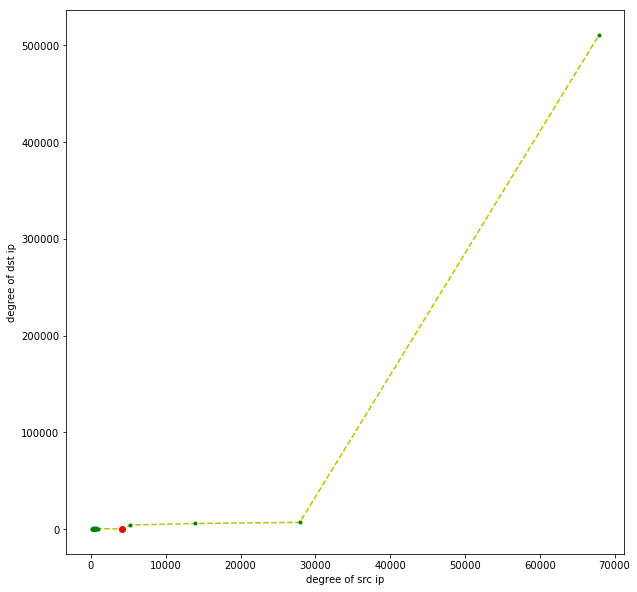

In [18]:
plt.figure(figsize=(10, 10))
plt.plot(x, y, 'y--')
plt.plot(x, y, 'g.')

plt.plot(bonet[0][0], bonet[0][1], 'ro')
plt.xlabel("degree of src ip")
plt.ylabel("degree of dst ip")
plt.savefig("degree.png")
plt.show()

plt.close()